In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def image_to_matrix(image):
    # Get the dimensions of the image
    rows, cols = len(image), len(image[0])
    resized_image_grayScale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_list = resized_image_grayScale.tolist()

    # Create an empty matrix (list of lists) to store the binary representation of the image
    matrix = [[0 for _ in range(cols)] for _ in range(rows)]

    # Go through each pixel in the image
    for y in range(rows):
        for x in range(cols):
            # Check if the pixel is black (pixel value = 0)
            if image_list[y][x] == 0:
                matrix[y][x] = 1  # Set the corresponding element in the matrix to 1

    return matrix

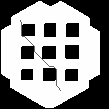

(90, 60)
(89, 59)
(88, 59)
(85, 56)
(69, 56)
(66, 53)
(66, 49)
(51, 34)
(46, 34)
(36, 24)
(36, 22)
(35, 21)
(22, 21)
(21, 20)
(20, 20)


In [ ]:
import math
import heapq
import cv2

def euclidean_distance(start, goal):
    return math.sqrt((goal[0] - start[0])**2 + (goal[1] - start[1])**2)

def get_neighbors(node, grid):
    neighbors = []
    directions = [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]

    for dir_x, dir_y in directions:
        neighbor_x = node[0] + dir_x
        neighbor_y = node[1] + dir_y

        if 0 <= neighbor_x < len(grid) and 0 <= neighbor_y < len(grid[0]) and grid[neighbor_x][neighbor_y] == 0:
            neighbors.append((neighbor_x, neighbor_y))

    return neighbors

def print_path_to_file(path, grid, file_path):
    with open(file_path, "w") as f:
        f.write("{")
        for i in range(len(grid)):
            f.write("{")
            for j in range(len(grid[0])):
                if (i, j) in path:
                    f.write("4")
                else:
                    f.write(str(grid[i][j]))
                if j < len(grid[0]) - 1:
                    f.write(", ")
            f.write("}")
            if i < len(grid) - 1:
                f.write(",\n")
        f.write("};\n")

def append_path_to_grid(path, grid):
  for i in range(len(grid)):
    for j in range(len(grid[0])):
      if (i, j) in path:
        grid[i][j] = 4

def a_star(grid, start, goal):
    open_list = [(0, start)]
    came_from = {}
    g_score = {start: 0}
    f_score = {start: euclidean_distance(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in get_neighbors(current, grid):
            tentative_g_score = g_score[current] + euclidean_distance(current, neighbor)

            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + euclidean_distance(neighbor, goal)
                heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None

def read_list_from_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Convert each line to an integer and store it in a list
    numbers_list = [int(line.strip()) for line in lines]

    return numbers_list

def find_points(grid, start_point, end_point, list_of_points):
  current_point = start_point
  previous_point = (0,0)
  list_of_points.append(start_point)

  flag = 0
  while(current_point != end_point):
    flag = 0
    for i in range(current_point[0] - 1, current_point[0] + 2):
      for j in range(current_point[1] - 1, current_point[1] + 2):
        #print(i, j)
        if grid[i][j] == 4 and (i,j) != previous_point and current_point != (i,j):
          previous_point = current_point
          current_point = (i,j)
          list_of_points.append(current_point)
          flag = 1
          break
      #print("\n")
      if flag:
        break

def get_direction(x1, y1, x2, y2):
    direction_dict = {
        (0, 1): "Right",
        (0, -1): "Left",
        (1, 0): "Down",
        (-1, 0): "Up",
        (1, 1): "Down-Right",
        (-1, -1): "Up-Left",
        (-1, 1): "Up-Right",
        (1, -1): "Down-Left",
    }

    dx = x2 - x1
    dy = y2 - y1

    direction = direction_dict.get((dx, dy), "Unknown")
    return direction

def find_boundary_points(points):
    segements = []

    start_point = points[0]
    next_point = points[1]
    segements.append(start_point)

    previous_dir = "Unknown"
    dir = get_direction(start_point[0], start_point[1], next_point[0], next_point[1])

    i = 1
    while(i < len(points) - 1):

        previous_dir = dir

        start_point = points[i]
        next_point = points[i+1]

        dir = get_direction(start_point[0], start_point[1], next_point[0], next_point[1])

        if previous_dir == dir:
           i += 1
        else:
           segements.append(start_point)
           i += 1

    segements.append(points[len(points) - 1])
    return segements

if __name__ == "__main__":
    # Example usage
    input_image_path = "/content/map_cropped_padded.png"
    image = cv2.imread(input_image_path)
    grid = image_to_matrix(image)
    start=(90,60)
    goal=(20,20)

    path = a_star(grid, start, goal)
    list = []

    if path:
      for pair in path:
        image[pair[0],pair[1]]=100
      cv2_imshow(image)
      cv2.waitKey(0)
      cv2.destroyAllWindows()

      append_path_to_grid(path, grid)
      find_points(grid, start, goal, list)
      segments = find_boundary_points(list)

      for segment in segments:
        print(segment)

    else:
        print("No path found.")

Mapiranje iz world koordinata simulatora u pixel space slike. Veza dva koordinatna sistema:
- smjerovi x i y koordinata su obrnuti u dva sistema tako da pri mapiranju moramo ih obrnuti/pomnoziti sa -1
- Koordinatno ishodiste u pixel spaceu slike je u gornjem lijevom cosku, dok u real world sistemu simulatora je u sredisnjem stubu cije su piksel koordinate (50,50), te je potrebno oduzeti 50,50 u cilju translacije ishodista da se poklope.
- Slika je dobivena koristenjem gmappinga sa rezolucijom od 0.05, sto znaci da jedan piksel odgovara 0.05 m u sistemu simulatora. Mnozimo sa tom proporcijom da prebacimo u sistem simulatora.

In [ ]:
tacke=[(90, 60),
(89, 59),
(88, 59),
(85, 56),
(69, 56),
(66, 53),
(66, 49),
(51, 34),
(46, 34),
(36, 24),
(36, 22),
(35, 21),
(22, 21),
(21, 20),
(20, 20)]

# Mapiranje iz piksel u sistem simulatora po gornjim koracima
w_tacke=[((-x+50)*0.05,(-y+50)*0.05) for x,y in tacke]
print(w_tacke)

[(-2.0, -0.5), (-1.9500000000000002, -0.45), (-1.9000000000000001, -0.45), (-1.75, -0.30000000000000004), (-0.9500000000000001, -0.30000000000000004), (-0.8, -0.15000000000000002), (-0.8, 0.05), (-0.05, 0.8), (0.2, 0.8), (0.7000000000000001, 1.3), (0.7000000000000001, 1.4000000000000001), (0.75, 1.4500000000000002), (1.4000000000000001, 1.4500000000000002), (1.4500000000000002, 1.5), (1.5, 1.5)]


In [ ]:
import numpy as np
xorig=np.load('/content/putanja.npy', allow_pickle=True)

# Prebacivanje iz putanje sistema simulatora u piksel koordinate
novetacke=[[-(x/0.05 -50),-(y/0.05 -50)] for x,y in xorig]

# Odbacivanje decimala jer su pixel koordinate intovi
x=np.around(novetacke,0)

# Eliminisanje viska tacaka sa istim koordinatama
noviniz=[]
for i in range(len(x)-1):
  if x[i+1][0]==x[i][0] and x[i+1][1]==x[i][1]:
    continue
  noviniz.append(x[i])

print(len(noviniz))
print(noviniz)

109
[array([90., 60.]), array([89., 60.]), array([88., 60.]), array([87., 60.]), array([87., 59.]), array([86., 59.]), array([85., 58.]), array([84., 58.]), array([84., 57.]), array([83., 57.]), array([82., 57.]), array([81., 57.]), array([80., 57.]), array([79., 57.]), array([78., 57.]), array([77., 57.]), array([76., 57.]), array([75., 57.]), array([74., 57.]), array([73., 57.]), array([72., 57.]), array([72., 56.]), array([71., 56.]), array([70., 56.]), array([69., 56.]), array([68., 56.]), array([68., 55.]), array([67., 55.]), array([66., 55.]), array([66., 54.]), array([66., 53.]), array([65., 53.]), array([65., 52.]), array([65., 51.]), array([64., 51.]), array([64., 50.]), array([64., 49.]), array([63., 49.]), array([63., 48.]), array([63., 47.]), array([62., 47.]), array([62., 46.]), array([61., 46.]), array([61., 45.]), array([60., 45.]), array([60., 44.]), array([59., 44.]), array([59., 43.]), array([58., 43.]), array([58., 42.]), array([57., 42.]), array([57., 41.]), array([